In [42]:
import numpy as np
import shutil
import math
import os, random
from PIL import Image
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import gender_guesser.detector as gender_detector

In [2]:
%matplotlib inline

In [104]:
LIKE_PATH = os.path.join('data', 'likes')
DISLIKE_PATH = os.path.join('data', 'dislikes')
LFW_DIR = 'lfw'
d = gender_detector.Detector()

In [4]:
# Save user in like or dislike folder
def save_user_swipe(username, gender, directory_path):
    swipe = None
    file_path = random.choice(os.listdir(directory_path))
    img = Image.open(os.path.join(directory_path, file_path))
    imgplot = plt.imshow(img)
    title = '{username} / {gender}'.format(username = username, gender = gender)
    plt.title(title)
    plt.show()
    while swipe != 'l' and swipe != 'd':
        swipe = input("What do you think of this person?")
        if swipe == 'l':
            shutil.copytree(directory_path, LIKE_PATH, dirs_exist_ok=True)
            print(username, 'saved on like')
        elif swipe == 'd':
            shutil.copytree(directory_path, DISLIKE_PATH, dirs_exist_ok=True)
            print(username, 'saved on dislike')
        elif swipe == 'end':
            print('------------ENDING----------')
            break
        else:
            print('Invalid input - type `l` for like and `d` for dislike')
    return swipe

In [47]:
# Get total of males / females / undeterminate users and pictures in directory
def directory_gender_info(directory_path):
    d = gender_detector.Detector()
    male = 0
    male_pictures = 0
    female = 0
    female_pictures = 0
    undeterminate = 0
    undeterminate_pictures = 0
    for directory in os.listdir(directory_path):
        if directory == '.DS_Store':
            continue
        username = directory.replace('_', ' ')
        gender = d.get_gender(username.split()[0])
        if os.path.isdir(os.path.join(directory_path, directory)):
            _, _, files = next(os.walk(os.path.join(directory_path, directory)))
            file_count = len(files)
        else:
            file_count = 1
        if gender == 'female' or gender == 'mostly_female':
            female +=1
            female_pictures += file_count
        elif gender == 'male' or gender == 'mostly_male':
            male +=1
            male_pictures += file_count
        elif gender == 'unknown' or gender == 'andy':
            undeterminate +=1
            undeterminate_pictures += file_count
        else:
            print('gender fail', gender)
    # Print info of directory
    total_people = female + male + undeterminate
    total_pictures = female_pictures + male_pictures + undeterminate_pictures
    print('Printing information of', directory_path,
      '\n\nfemales =', female, 'female pictures =', female_pictures,
      '\nmale =', male, 'male pictures =', male_pictures,
      '\nundeterminate =', undeterminate, 'undeterminate pictures =', undeterminate_pictures,
      '\ntotal people =',
      total_people,
      'total pictures', 
      total_pictures
     )
    return total_pictures

In [6]:
def clean_directory(directory_path):
    for file_name in os.listdir(directory_path):
        # construct full file path
        file = os.path.join(directory_path, file_name)
        if os.path.isfile(file):
            print('Deleting file:', file)
            os.remove(file)

In [116]:
clean_directory(LIKE_PATH)
clean_directory(DISLIKE_PATH)

Deleting file: data/likes/Thabo_Mbeki_0005_r270.jpg
Deleting file: data/likes/Thabo_Mbeki_0004_r270.jpg
Deleting file: data/likes/Felix_Sanchez_0001_r90.jpg
Deleting file: data/likes/Thabo_Mbeki_0005.jpg
Deleting file: data/likes/Thabo_Mbeki_0001_r90.jpg
Deleting file: data/likes/Helio_Rubens_Garcia_0001_r90.jpg
Deleting file: data/likes/John_Sidgmore_0001.jpg
Deleting file: data/likes/Thabo_Mbeki_0004.jpg
Deleting file: data/likes/Raoul_Ruiz_0001_m.jpg
Deleting file: data/likes/John_Starks_0001_r180.jpg
Deleting file: data/likes/Helio_Rubens_Garcia_0001_r90m.jpg
Deleting file: data/likes/Gavyn_Davies_0001.jpg
Deleting file: data/likes/Mohamed_ElBaradei_0007_r270.jpg
Deleting file: data/likes/Raoul_Ruiz_0004.jpg
Deleting file: data/likes/Felix_Sanchez_0001_r180.jpg
Deleting file: data/likes/Ken_Balk_0001_r90.jpg
Deleting file: data/likes/Raoul_Ruiz_0001_r180.jpg
Deleting file: data/likes/Pyar_Jung_Thapa_0001.jpg
Deleting file: data/likes/Raoul_Ruiz_0001.jpg
Deleting file: data/likes/Mo

Type `d` if you DISLIKE the person and `l` if you LIKE it


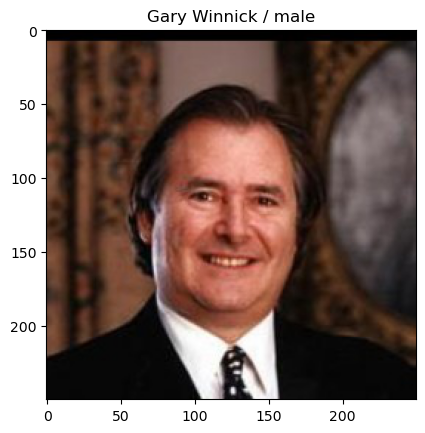

What do you think of this person?d
Gary Winnick saved on dislike


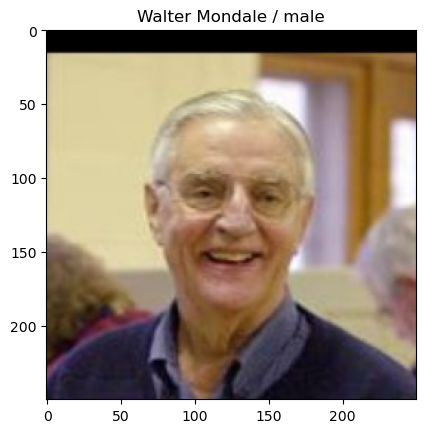

What do you think of this person?d
Walter Mondale saved on dislike


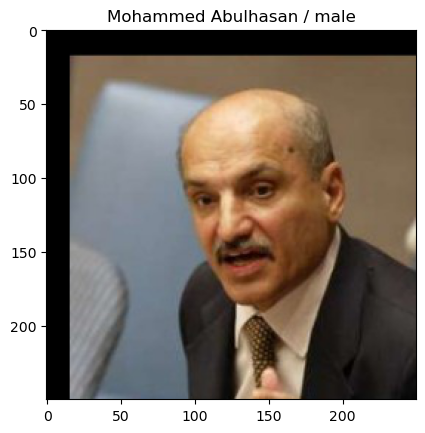

What do you think of this person?d
Mohammed Abulhasan saved on dislike


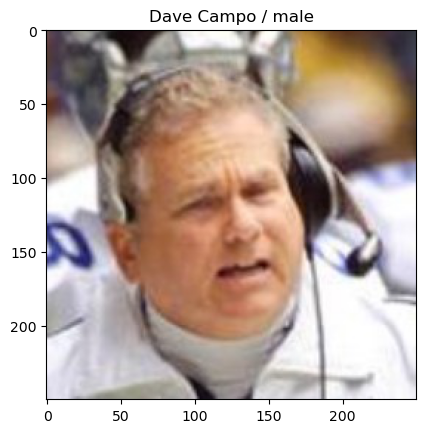

What do you think of this person?d
Dave Campo saved on dislike


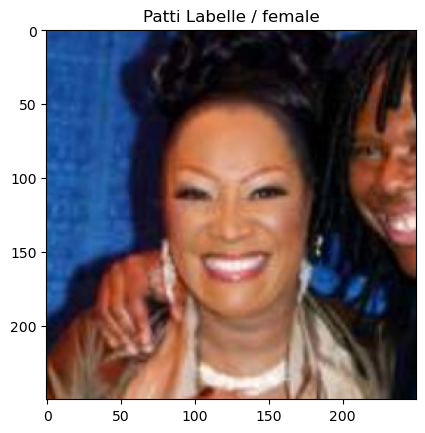

What do you think of this person?d
Patti Labelle saved on dislike


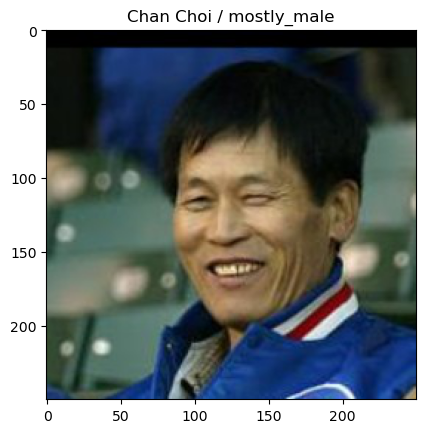

What do you think of this person?d
Chan Choi saved on dislike


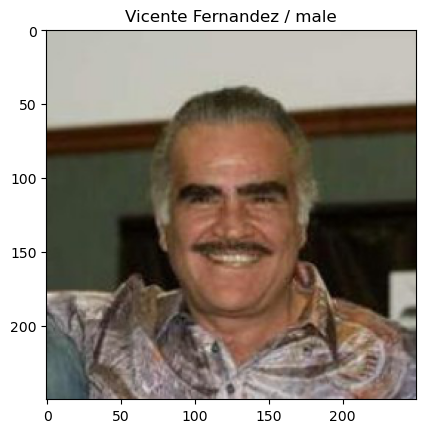

What do you think of this person?d
Vicente Fernandez saved on dislike


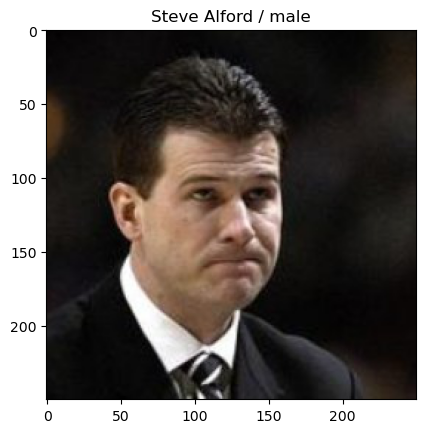

What do you think of this person?d
Steve Alford saved on dislike


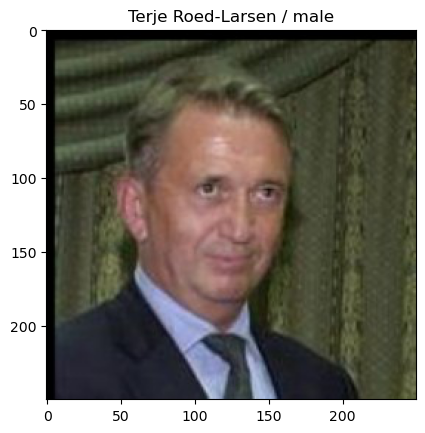

What do you think of this person?d
Terje Roed-Larsen saved on dislike


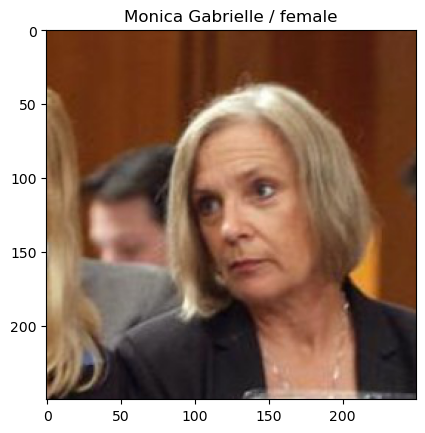

What do you think of this person?d
Monica Gabrielle saved on dislike


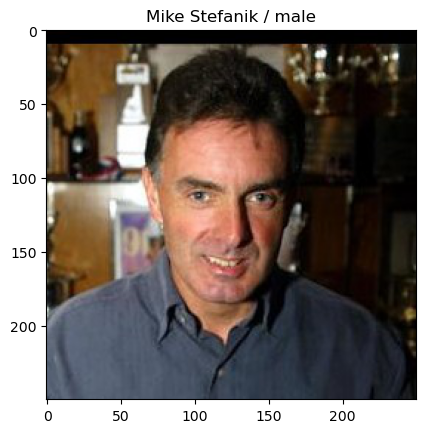

What do you think of this person?d
Mike Stefanik saved on dislike


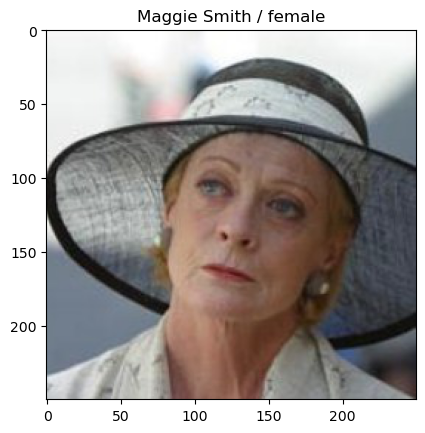

What do you think of this person?d
Maggie Smith saved on dislike


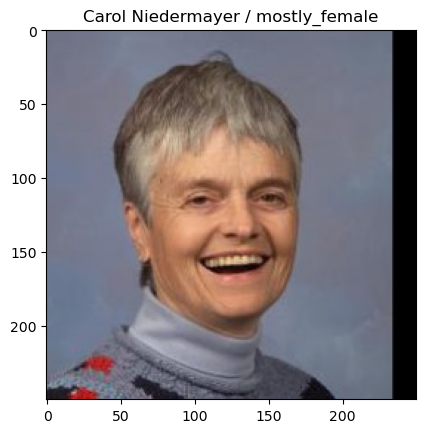

What do you think of this person?d
Carol Niedermayer saved on dislike


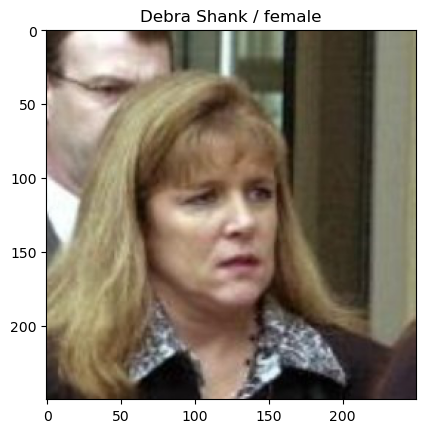

What do you think of this person?d
Debra Shank saved on dislike


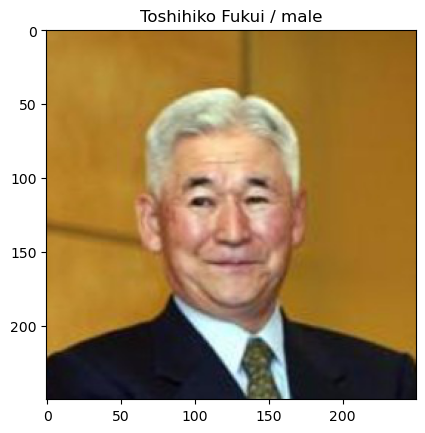

What do you think of this person?d
Toshihiko Fukui saved on dislike


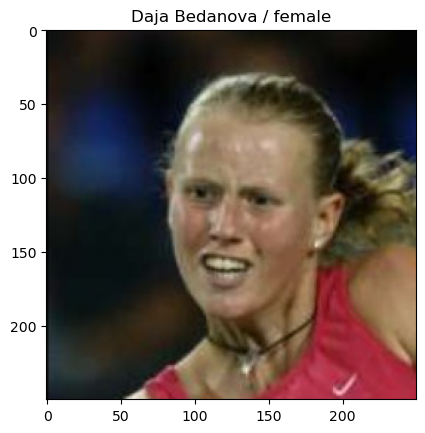

What do you think of this person?l
Daja Bedanova saved on like


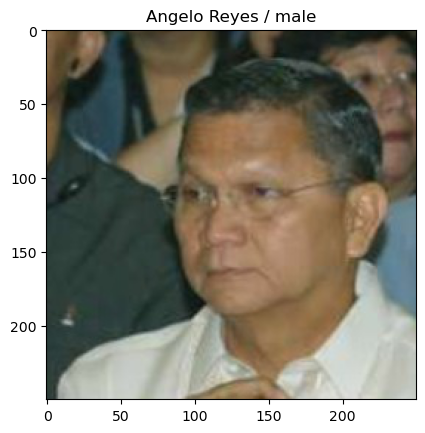

What do you think of this person?l
Angelo Reyes saved on like


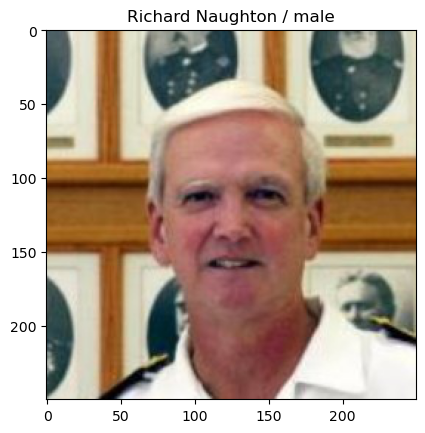

What do you think of this person?l
Richard Naughton saved on like


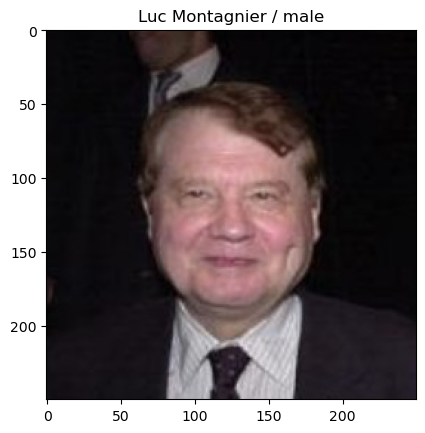

What do you think of this person?l
Luc Montagnier saved on like


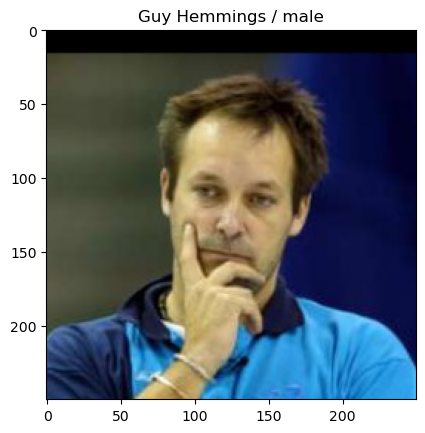

What do you think of this person?l
Guy Hemmings saved on like


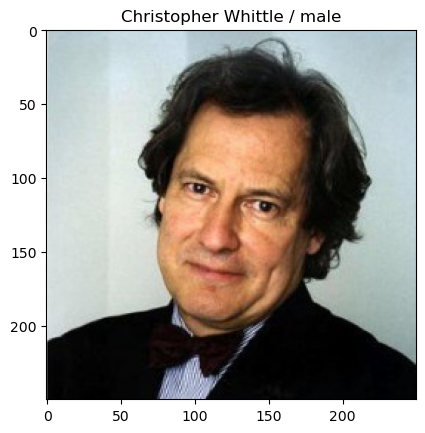

What do you think of this person?l
Christopher Whittle saved on like


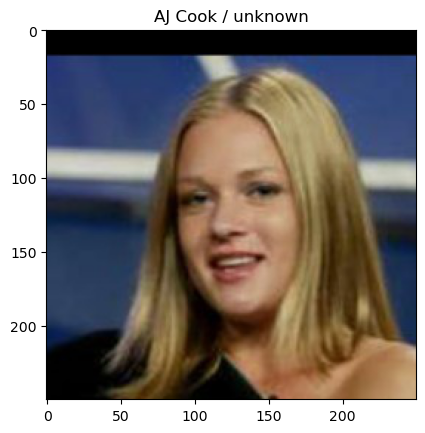

What do you think of this person?l
AJ Cook saved on like


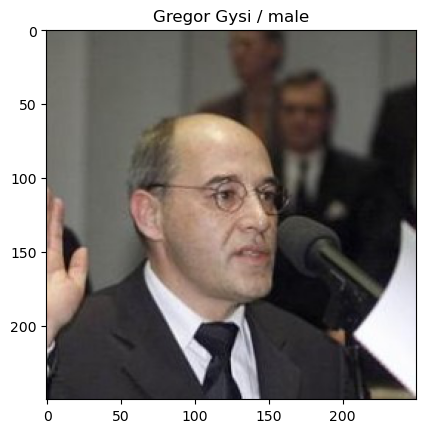

What do you think of this person?l
Gregor Gysi saved on like


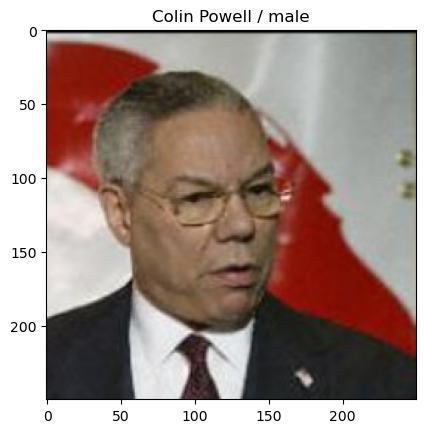

What do you think of this person?l
Colin Powell saved on like


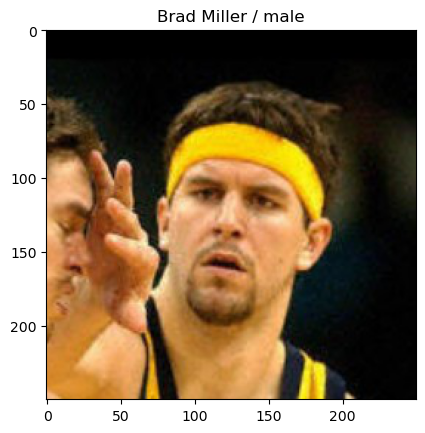

What do you think of this person?l
Brad Miller saved on like


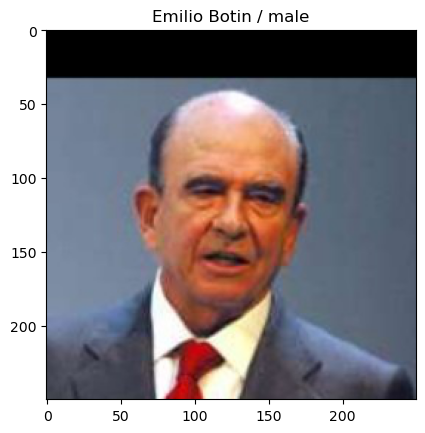

What do you think of this person?end
------------ENDING----------


In [117]:
users = os.listdir(LFW_DIR)
random.shuffle(users)
print('Type `d` if you DISLIKE the person and `l` if you LIKE it')
for directory in users:
    if directory == '.DS_Store':
        continue
    username = directory.replace('_', ' ')
    gender = d.get_gender(username.split()[0])
    answer = save_user_swipe(username, gender, os.path.join(LFW_DIR, directory))
    if answer == 'end':
        break

## Data enhancement

In [107]:
MIN_IMAGES = 160

In [118]:
like_total = directory_gender_info(LIKE_PATH)
dislike_total = directory_gender_info(DISLIKE_PATH)

Printing information of data/likes 

females = 1 female pictures = 1 
male = 247 male pictures = 247 
undeterminate = 1 undeterminate pictures = 1 
total people = 249 total pictures 249
Printing information of data/dislikes 

females = 8 female pictures = 8 
male = 29 male pictures = 29 
undeterminate = 0 undeterminate pictures = 0 
total people = 37 total pictures 37


In [109]:
def enhance_dir(file, directory):
    filename = file.replace('.jpg', '')
    src_img = cv2.imread(os.path.join(directory, file))
    fliped_filename = filename + '_f'+ '.jpg'
    mirror_filename = filename + '_m' + '.jpg'
    cv2.imwrite(os.path.join(directory, fliped_filename), cv2.flip(src_img,0))
    cv2.imwrite(os.path.join(directory, mirror_filename), cv2.flip(src_img,1))
    new_img = src_img
    for i in range(3):
        rotated_filename = filename + '_r' + str(90*(i+1)) + '.jpg'
        new_img = cv2.rotate(new_img, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(os.path.join(directory, rotated_filename), new_img)
        if i == 0:
            rotated_fliped_filename = filename + '_r' + str(90*(i+1)) + 'f' + '.jpg'
            rotated_mirror_filename = filename + '_r' + str(90*(i+1)) + 'm' + '.jpg'
            cv2.imwrite(os.path.join(directory, rotated_fliped_filename), cv2.flip(new_img,0))
            cv2.imwrite(os.path.join(directory, rotated_mirror_filename), cv2.flip(new_img,1))

In [115]:
enhanced_pictures_likes = math.ceil((MIN_IMAGES - like_total)/8)
enhanced_pictures_dislikes = math.ceil((MIN_IMAGES - dislike_total)/8)
print(enhanced_pictures_likes, enhanced_pictures_dislikes)

4 -22


In [112]:
files = []
for i in range(enhanced_pictures_likes):
    file = random.choice(os.listdir(LIKE_PATH))
    if file not in files and file != '.DS_STORE':
        files.append(file)

for file in files:
    enhance_dir(file, LIKE_PATH)
    if file not in files and file != '.DS_STORE':
        files.append(file)

In [102]:
files = []
for i in range(enhanced_pictures_dislikes):
    file = random.choice(os.listdir(DISLIKE_PATH))
    if file not in files and file != '.DS_STORE':
        files.append(file)

for file in files:
    enhance_dir(file, DISLIKE_PATH)

# Tests

lfw/Chris_Noth/Chris_Noth_0001.jpg
8


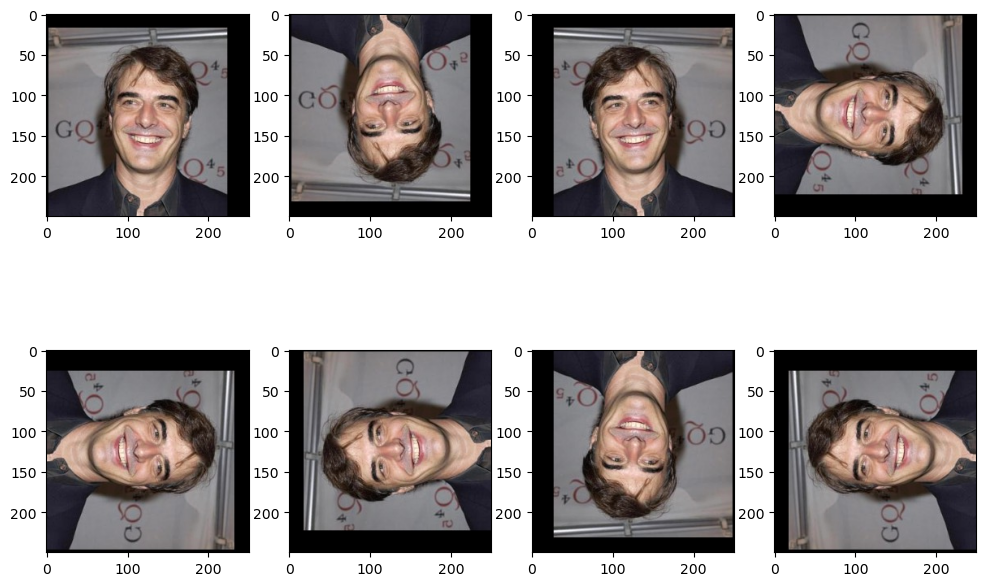

In [39]:
random_file = None
while random_file == None:
    random_dir = random.choice(os.listdir(LFW_DIR))
    random_file = random.choice(os.listdir(os.path.join(LFW_DIR, random_dir)))
file_path = os.path.join(LFW_DIR, random_dir, random_file)
print(file_path)
src_img = cv2.imread(file_path)
new_img = src_img
imgs_enhanced = [src_img, cv2.flip(src_img,0), cv2.flip(src_img,1)]
for i in range(3):
    new_img = cv2.rotate(new_img, cv2.ROTATE_90_CLOCKWISE)
    imgs_enhanced.append(new_img)
    if i == 0:
        imgs_enhanced.append(cv2.flip(new_img,0))
        imgs_enhanced.append(cv2.flip(new_img,1))
print(len(imgs_enhanced))
fig = plt.figure(figsize=(12,8))
rows = 2
cols = 4

cont = 1
for img in imgs_enhanced:
    fig.add_subplot(rows, cols, cont)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cont+=1

In [176]:
# Test all women
for directory in os.listdir(LFW_DIR):
    if directory == '.DS_Store':
        continue
    username = directory.replace('_', ' ')
    gender = d.get_gender(username.split()[0])
    if gender == 'female' or gender == 'mostly_female':
        shutil.copytree(os.path.join(LFW_DIR, directory), LIKE_PATH, dirs_exist_ok=True)
    else:
        shutil.copytree(os.path.join(LFW_DIR, directory), DISLIKE_PATH, dirs_exist_ok=True)
        